# Netcdf and map making basics

Netcdf files are self describing datasets. There are many ways to read netcdf files. In python, one of the most useful packages for doing so is called [xarray](https://docs.xarray.dev/en/stable/).

In [3]:
import xarray as xr

In [4]:
filename = "boreas_mystery.nc"
ds = xr.open_dataset(filename)

Xarray provides a very nice interface to explore what's inside of a dataset for jupyter notebooks. Evaluate the cell below and you will see a lot of information appear. There are drop downs and icons that you can click to learn more information. Don't worry, all of the actions only read data and cannot modify the dataset.

In [6]:
ds

<xarray.Dataset>
Dimensions:        (location: 6)
Coordinates:
  * location       (location) object 'NCAR Mesa Lab' ... 'Flagstaff Mountain'
Data variables:
    latitude       (location) float64 ...
    longitude      (location) float64 ...
    location_name  (location) object ...
Attributes:
    title:        The Mystery of Boreas the Penguin
    institution:  NCAR - National Center for Atmospheric Research
    history:      Created for the NSF SOARS interns
    comment:      The wind whispers secrets. Seek Boreas where science meets ...

---
Ok, it looks like we have some latitudes and longitudes, as well as some labels for them. Often, it is easier to understand data when we plot them. Since this is geographic data, lets plot it on the map. Two commonly used pacakges for plotting in python are [matplotlib](https://matplotlib.org/) (for any kind of data) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html) (an extension to matplotlib that allows for nice geographic plots).

You will often see them imported using the `as` keyword, which makes an alias for a package in your local namespace.

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

To start, let's make a plot of the earth and explore some common terms you may need to plot geographic data. The cell below will plot the entire earth using a map [projection](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) known as the Plate Carree projection.

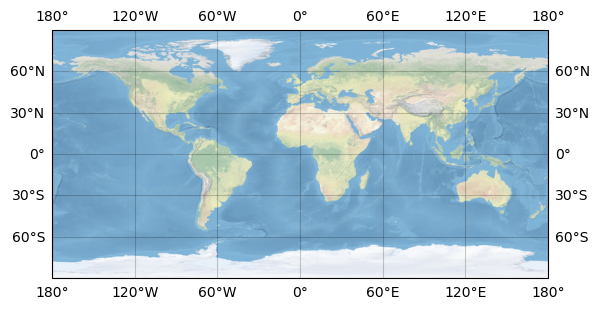

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.gridlines(draw_labels=True, alpha=0.2, color='black')
ax.stock_img()

There are many types of projections. All projectons represent the earth in different coordinate systems and can create maps to emphasize different features. The Plate Caree projection is nice because it represents a 2d grid as if all of the latitude and longitudes are equidistant, meaning that one degree in the latitudue or longitude direciton is equal at all points of the earth (which is not true).

A more common projection you may have heard of is the [Robinson](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#robinson) projection. To change a map's projection, simply use a different one in the `subplot_kw` dictionary when making a figure.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid va

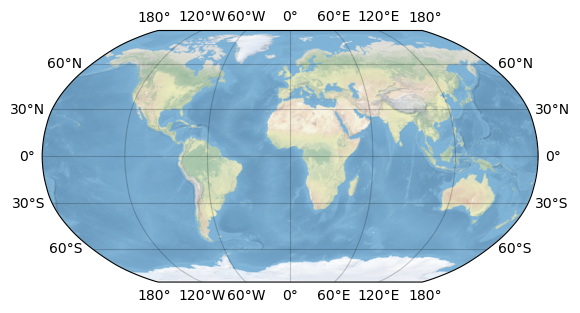

In [12]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))

ax.gridlines(draw_labels=True, alpha=0.2, color='black')
ax.stock_img()

Projections can also be centered around a specific area. For example, we will recreate the famous United States shield map, which is created using the [Albers Equal Area](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#albersequalarea) projection, using the center of the United States as its focal point. But this time we will also restrict the bounds to a box which bounds the contiguous US. We will also use some higher resolution basemap features since the default `stock_img` would be too pixelated at this smaller scale. These come installed with cartopy in the [feature](https://scitools.org.uk/cartopy/docs/latest/reference/feature.html) subpackage.

You will also notice that when we set the extent (bounding box) of the map that we add a `PlateCaree()` argument. This is not required here because `PlateCaree` and `AlbersEqualArea` both operate on latitude and longitude values, but some prejections operate on a different set of underlying data values. The second argument to `set_extent` specifies the coordiante reference system of the input arguments and allows cartopy to accurately transform the input data points into the coordinate reference system that the map is plotted on. In general it is good practice to specify the coordinate reference system each time you can so that the base map projection can be changed without updating operations on the map.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sha

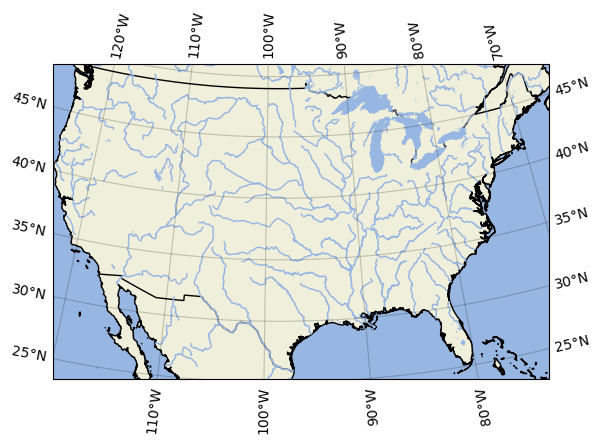

In [20]:
import cartopy.feature as cfeature

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.AlbersEqualArea(central_latitude=39.8283, central_longitude=-98.5795)))

minlat = 25
maxlat = 49
minlon = -120
maxlon = -73

ax.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())

ax.gridlines(draw_labels=True, alpha=0.2, color='black')

ax.add_feature(cfeature.LAND.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))
ax.add_feature(cfeature.RIVERS.with_scale('10m'))

# The Clue

Text(0.5, 1.0, 'Locations: The Mystery of Boreas the Penguin')

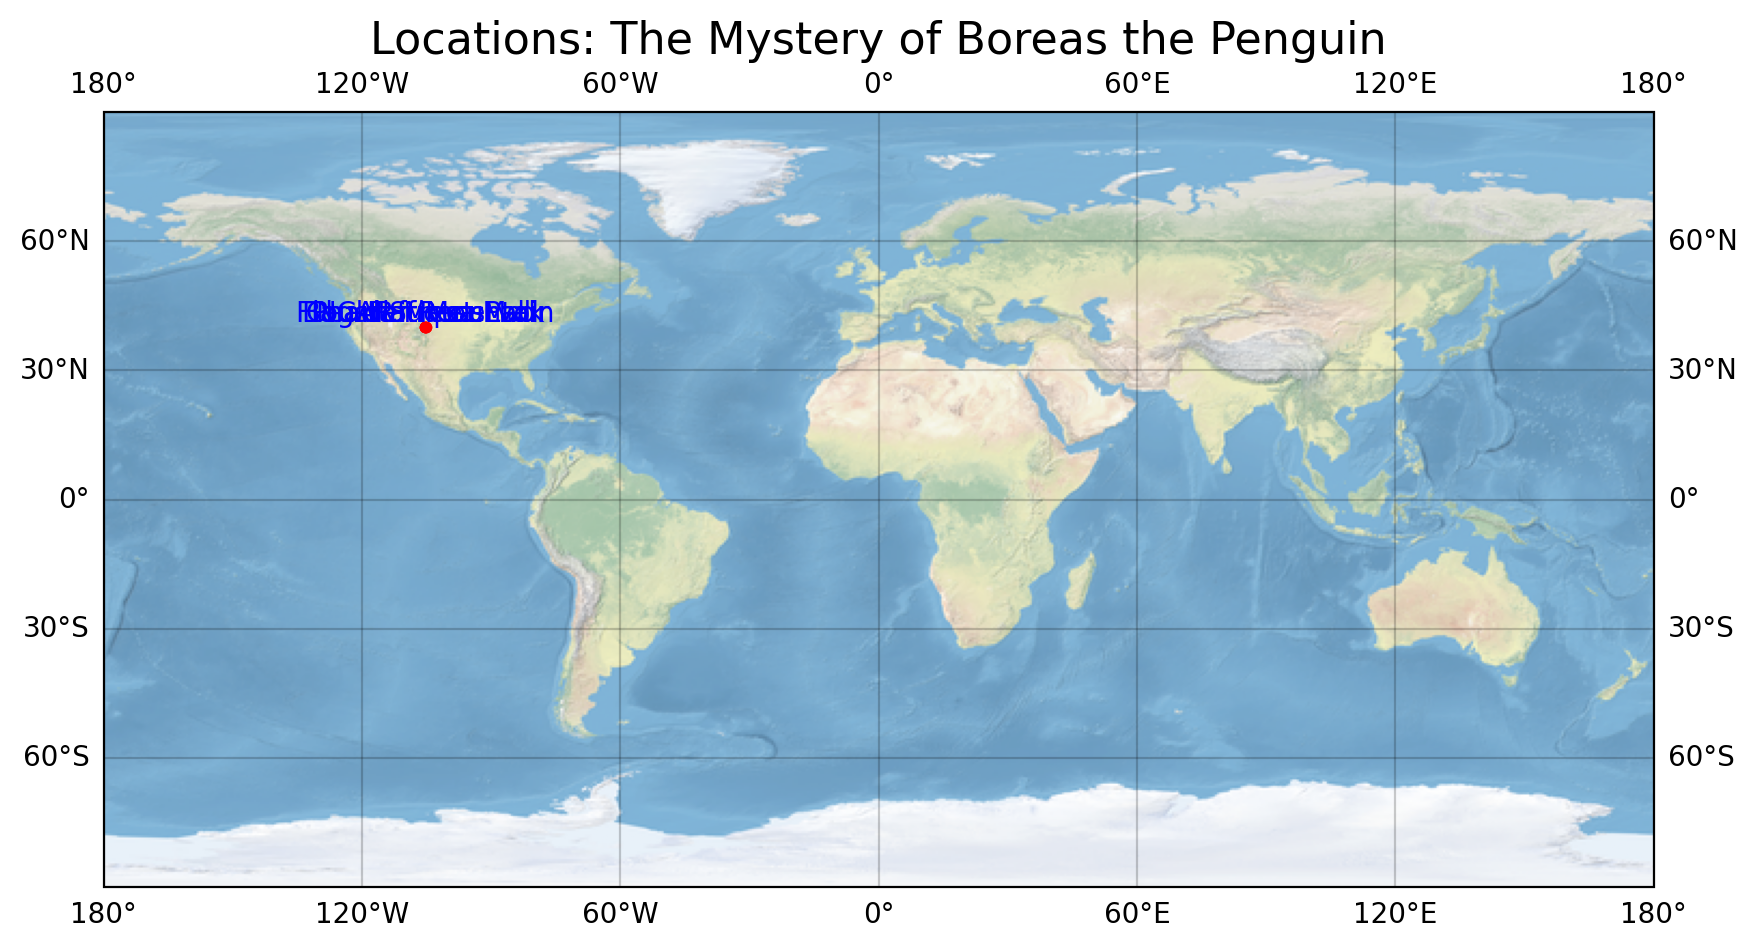

In [52]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=200, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.gridlines(draw_labels=True, alpha=0.2, color='black')
ax.stock_img()

ax.scatter(ds.longitude.values, ds.latitude.values, color='red', s=10, edgecolor=None, transform=ccrs.PlateCarree())

for i, location in enumerate(ds.location_name.values):
    ax.text(ds.longitude.values[i], ds.latitude.values[i], location, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

plt.title("Locations: The Mystery of Boreas the Penguin", fontsize=16)

Text(0.5, 1.0, 'Locations: The Mystery of Boreas the Penguin')

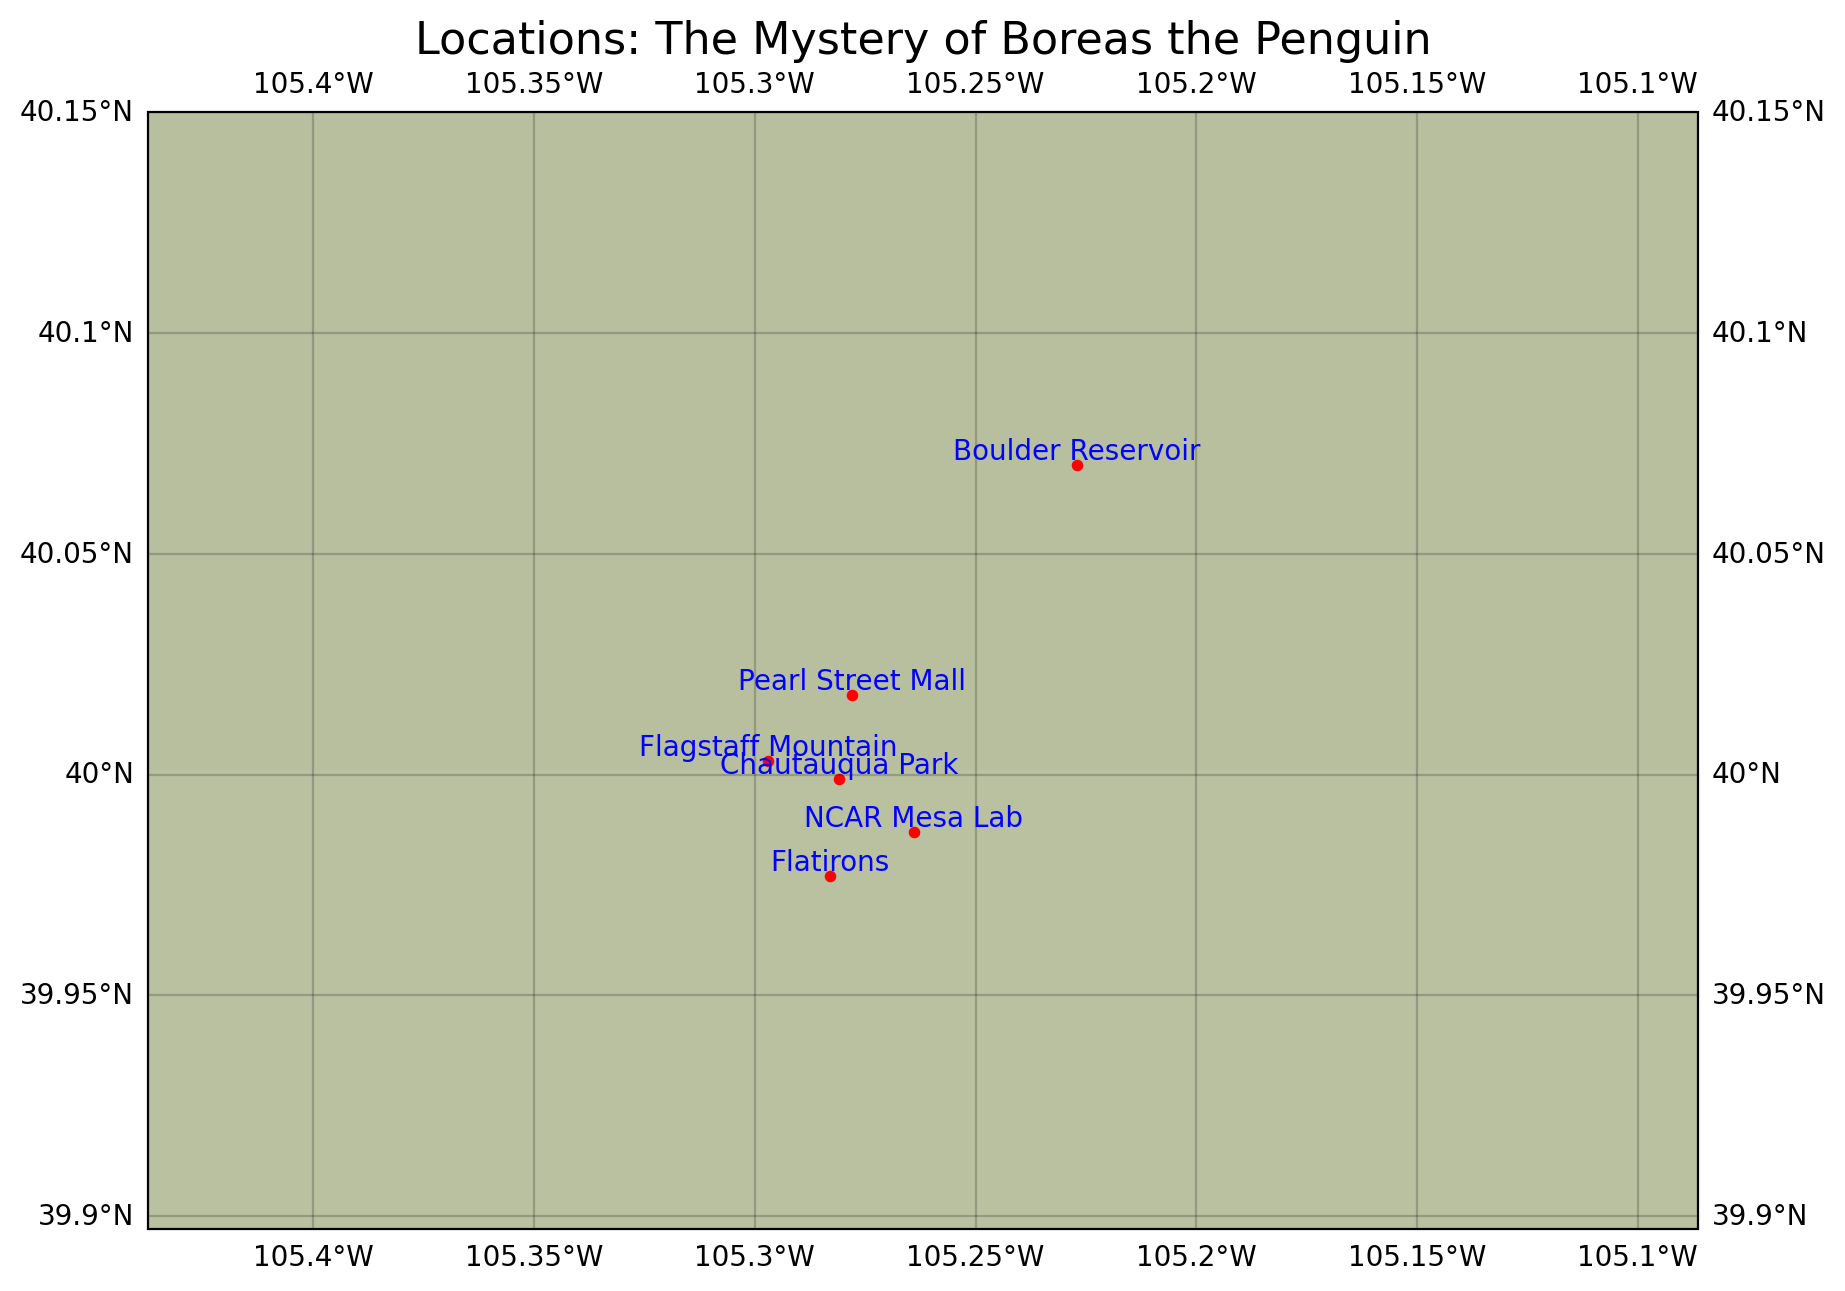

In [53]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=200, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.gridlines(draw_labels=True, alpha=0.2, color='black')
ax.stock_img()

xbuf = .002
ybuf = .002

minlat = ds.latitude.min().item() * (1-ybuf)
maxlat = ds.latitude.max().item() * (1+ybuf)
minlon = ds.longitude.min().item() * (1-xbuf)
maxlon = ds.longitude.max().item() * (1+xbuf)

ax.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())

ax.scatter(ds.longitude.values, ds.latitude.values, color='red', s=10, edgecolor=None, transform=ccrs.PlateCarree())

for i, location in enumerate(ds.location_name.values):
    ax.text(ds.longitude.values[i], ds.latitude.values[i], location, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

plt.title("Locations: The Mystery of Boreas the Penguin", fontsize=16)

Text(0.5, 1.0, 'Locations: The Mystery of Boreas the Penguin')

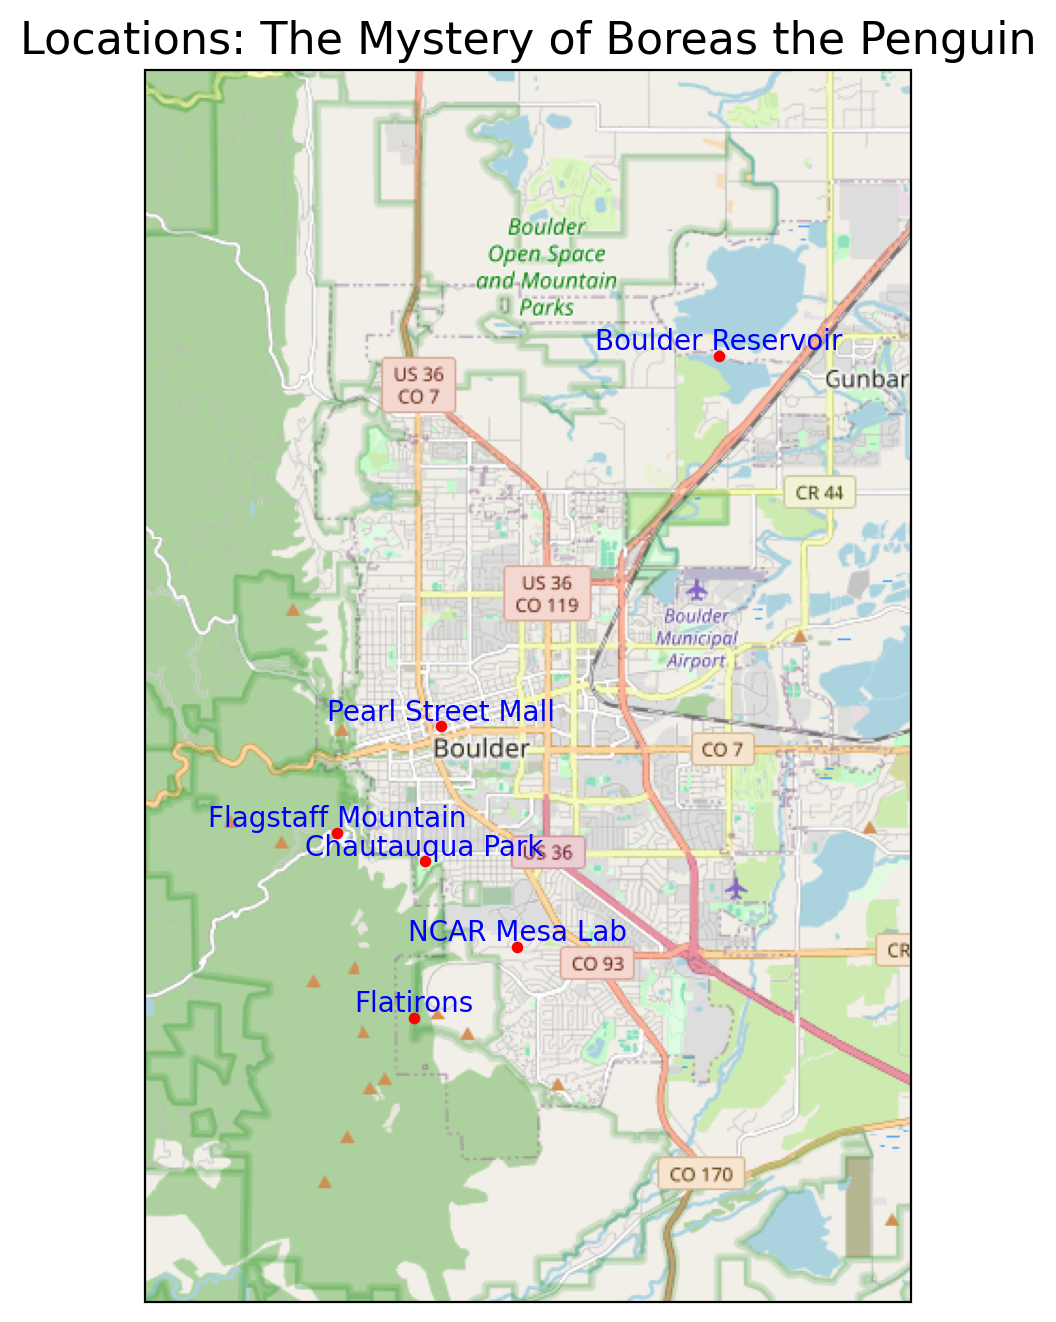

In [55]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

tiler = cimgt.OSM() 
mercator = tiler.crs 

fig, ax = plt.subplots(figsize=(10, 8), dpi=200, subplot_kw=dict(projection=mercator))

ax.add_image(tiler, 12)  # 12 is the zoom level; adjust for detail level

xbuf = .001
ybuf = .001

minlat = ds.latitude.min().item() * (1 - ybuf)
maxlat = ds.latitude.max().item() * (1 + ybuf)
minlon = ds.longitude.min().item() * (1 - xbuf)
maxlon = ds.longitude.max().item() * (1 + xbuf)

ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())

ax.scatter(ds.longitude.values, ds.latitude.values, color='red', s=10, edgecolor=None, transform=ccrs.PlateCarree())

for i, location in enumerate(ds.location_name.values):
    ax.text(ds.longitude.values[i], ds.latitude.values[i], location, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

plt.title("Locations: The Mystery of Boreas the Penguin", fontsize=16)